In [3]:
# Taken from a tutorial: https://www.datacamp.com/community/tutorials/wordcloud-python

import numpy as np
import pandas as pd
from os import path
# from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Create word cloud from entire proceedings

import os

DIR = 'InternationalModelicaConference/textcleaned'

year = [2000,2002,2003,2005,2006,2008,2009,2011,2012,2014,2015,2017]

text_full = ''
text_full_list = {}
for name in os.listdir(DIR):
    if os.path.isfile(os.path.join(DIR, name)):
        with open(os.path.join(DIR, name),'r') as fil:
            temp = fil.read().lower()
        text_full_list[name.replace('.txt','')] = temp
        text_full += ' ' + temp
print ("There are {} words in all files.".format(len(text_full)))

There are 29371240 words in all files.


In [5]:
# Remove all single letter words
text_full = ' '.join( [w for w in text_full.split() if len(w)>1] )

# Remove trailing 's' on words (i.e., words => word)
# text_full = ' '.join(w[:-1] if w[-1]== 's' else w for w in text_full.split() )

In [6]:
print ("There are {} words in all files.".format(len(text_full)))

There are 28424170 words in all files.


In [18]:
# Create stopword list:
stopwords = set(STOPWORDS)

months = ['january','february','march','april','may','june','july','august','september','october','november','december']
locations = ['italy','germany','france','czech','republic','munich','lund','sweden','prague']
numbers = ['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th','11th','12th','13th','14th','15th','16th',
           '17th','18th','19th','20th','21st','22nd','23rd','24th','25th','26th','27th','28th','29th','20th','31st',
           'first','second','third','fourth','fifth','sixth','seventh','eighth','ninth','tenth']
modelica = ['equation','function','type','parameter','component','example','contain','within','real','boolean',
            'string','package','modelica']

stopwords_add = months+locations+numbers+modelica+[
                'proceeding','simulation', 'model', 'system','based','result','tool',
                'library','used','developed','using','approach','present','use',
                'paper','well','one','thu','figure','will','et al','international conference','international',
                'conference','conference september','DOI','two','association','thus','within','et','al','therefore','three','way']
    
# Additional stopwords based on lists
# - and 's' to end of each word for plurals
# - capitalize each word (REMOVED as added to read step):  + [word.capwords() for word in stopwords_add]
stopwords_add = stopwords_add + [word+'s' for word in stopwords_add]

# Update stopwords
stopwords.update(stopwords_add)

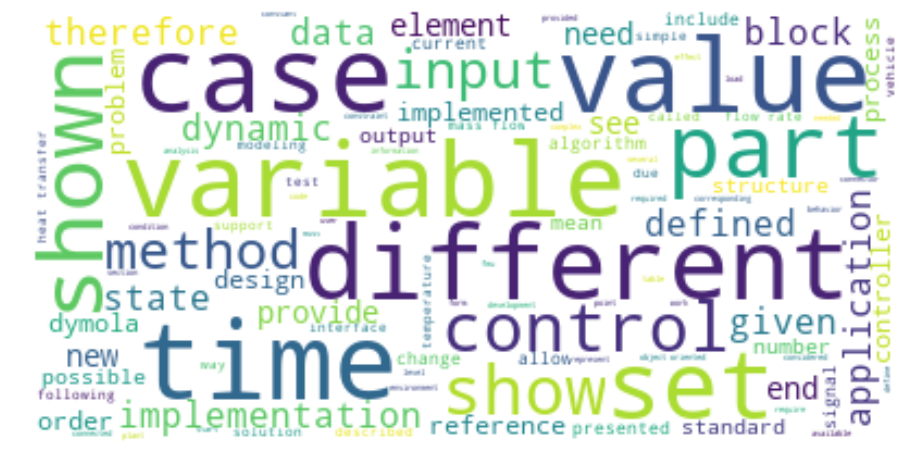

In [8]:
# For entire text

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text_full)

# Display the generated image:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

s = os.path.split(DIR)[:-1]
figName = os.path.join(*s,'plots','text_full')

wordcloud.to_file('{}.png'.format(figName))

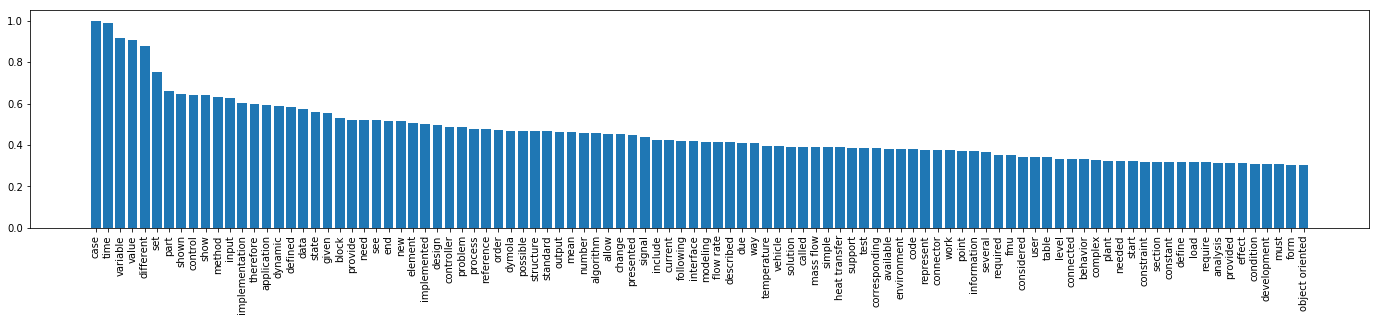

In [9]:
# Bar plot for visualing most common
fig = plt.figure(figsize=(24,4))
plt.bar(wordcloud.words_.keys(),wordcloud.words_.values())
plt.xticks(rotation='vertical');

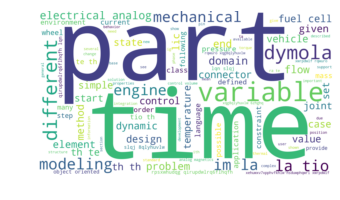

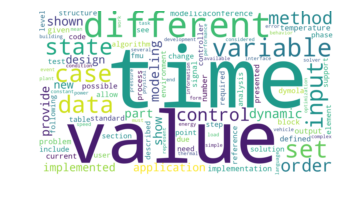

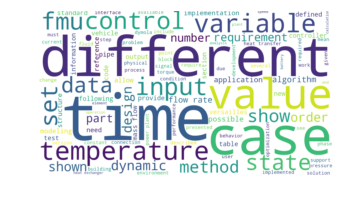

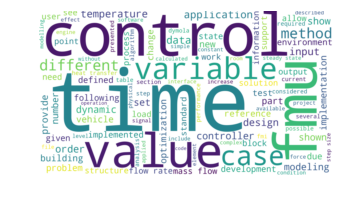

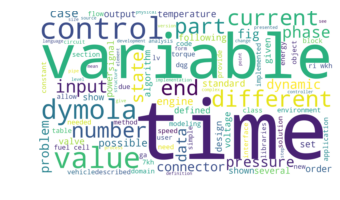

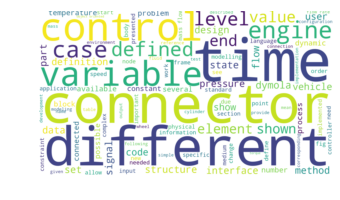

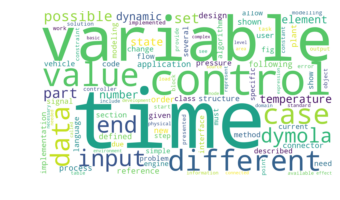

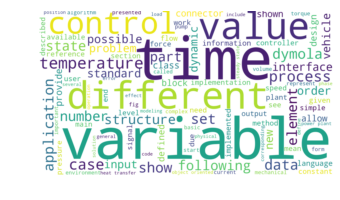

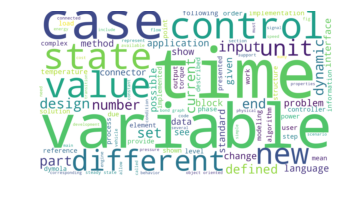

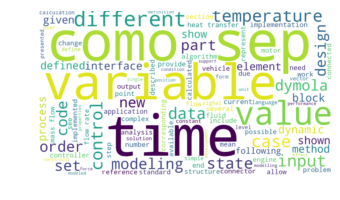

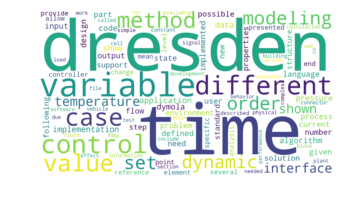

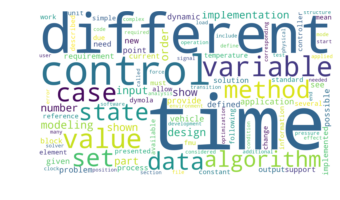

In [39]:
# Per conference text

for key, val in text_full_list.items():
    
    val = ' '.join( [w for w in val.split() if len(w)>1] )
    
    # Generate a word cloud image 
    wordcloud = WordCloud(width=1920, height=1080, max_words=100, stopwords=stopwords, background_color="white").generate(val)

    # Display the generated image:
    plt.figure(figsize=(16,9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    s = os.path.split(DIR)[:-1]
    figName = os.path.join(*s,'plots',key)

    wordcloud.to_file('{}.png'.format(figName))

** Alternative Method **
    - Count specific words and create figure
    - This helps overcome issue of endlessly adding to stopwords list
    - Downside is that it will only report what was included in the `includeWords` list

In [34]:
# Set keywords to be counted
simEnv = ['dymola','openmodelica','jmodelica','systemmodeler','amesim','maplesim','simulationx','simplorer','mworks','optimica']
topics = ['thermal','hydraulic','fluid','heat','transfer','nuclear','energy','storage','control','electricity','mechanics','hybrid','optimization','']
includeWords = simEnv + topics

In [35]:
# Count number of each of the includeWords
includeWordsCount = dict.fromkeys(includeWords)
for word in includeWords:
    includeWordsCount[word] = text_full.split().count(word)
    if includeWordsCount[word] == 0:
        del includeWordsCount[word]

In [36]:
# # Create list and then string of repeated values to regenerate input for wordCloud
# text_includeWords_list = [key for key, value in includeWordsCount.items() for i in range(value)]
# text_includeWords = ' '.join(text_includeWords_list)

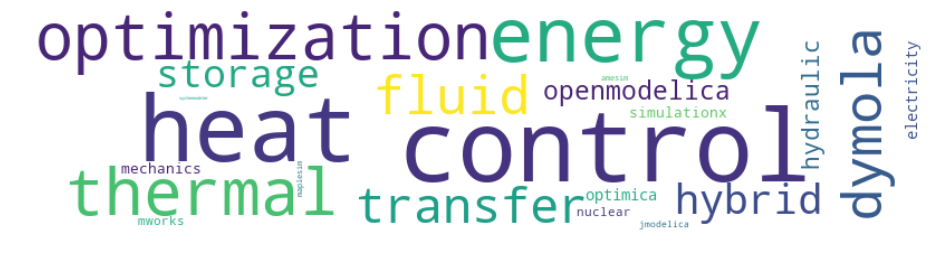

In [37]:
# For entire text

# Generate a word cloud image
wordcloud = WordCloud(background_color="white",width=800).generate_from_frequencies(includeWordsCount)

# Display the generated image:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

s = os.path.split(DIR)[:-1]
figName = os.path.join(*s,'plots','text_includeWords')

wordcloud.to_file('{}.png'.format(figName))

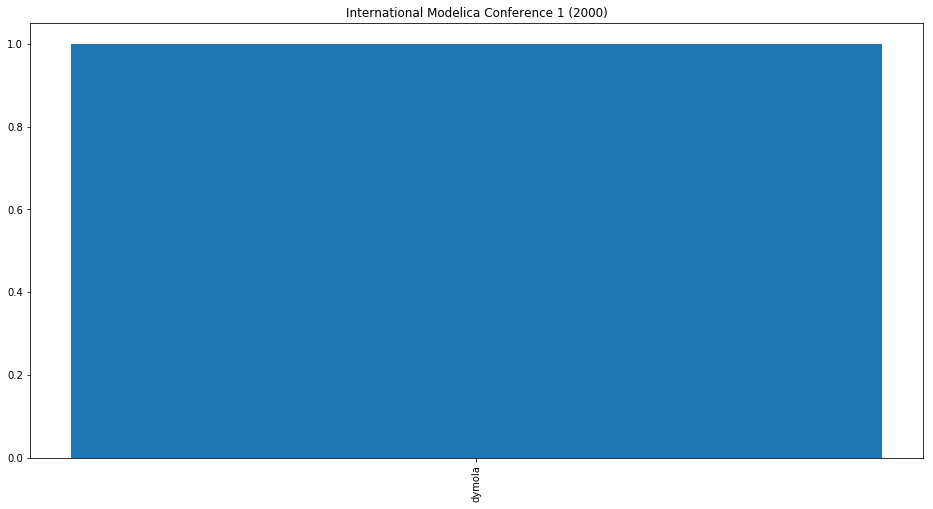

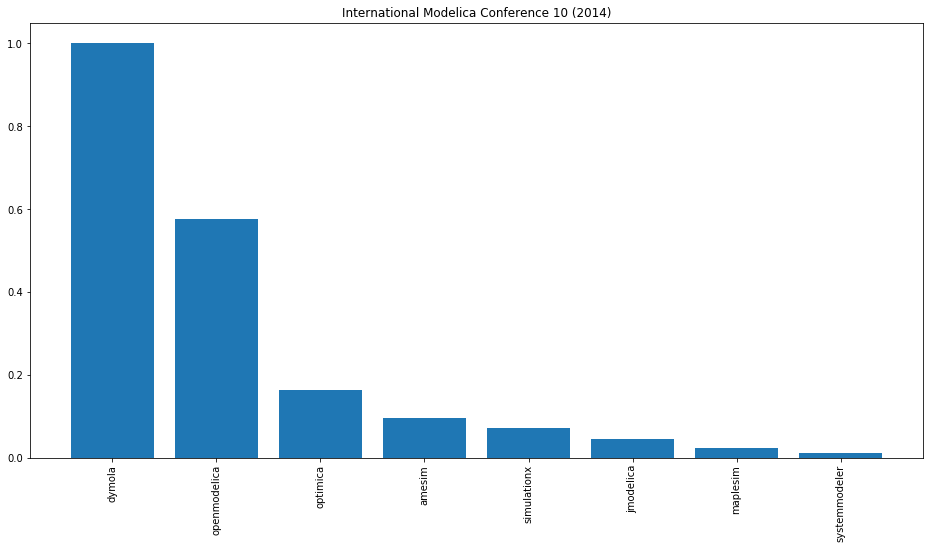

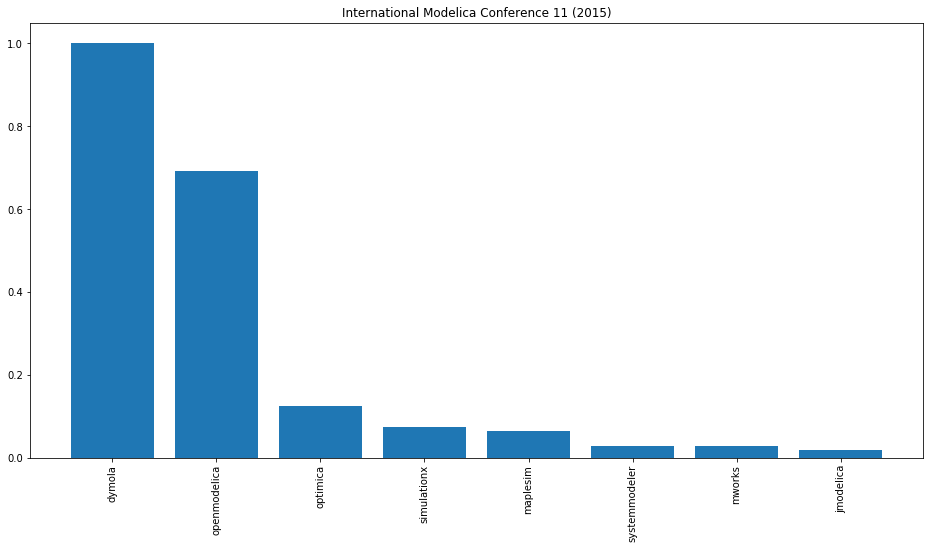

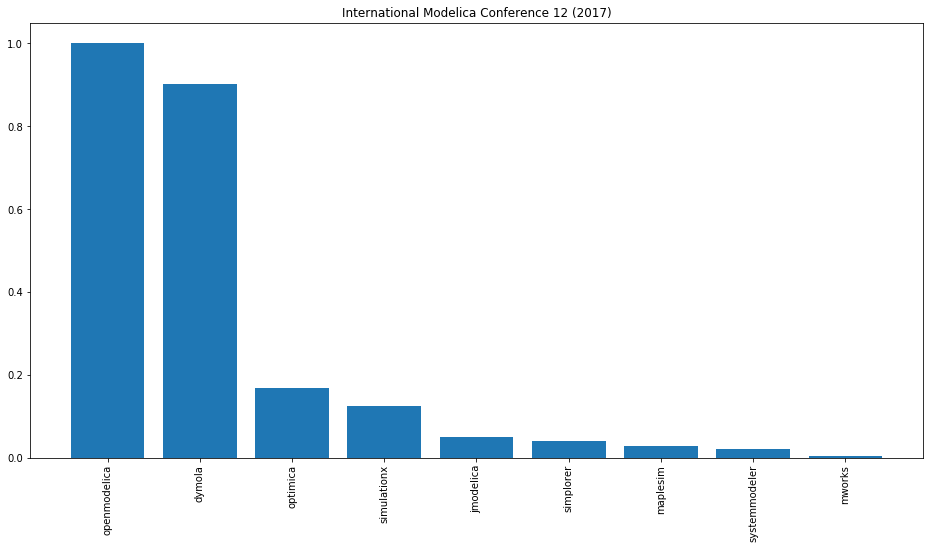

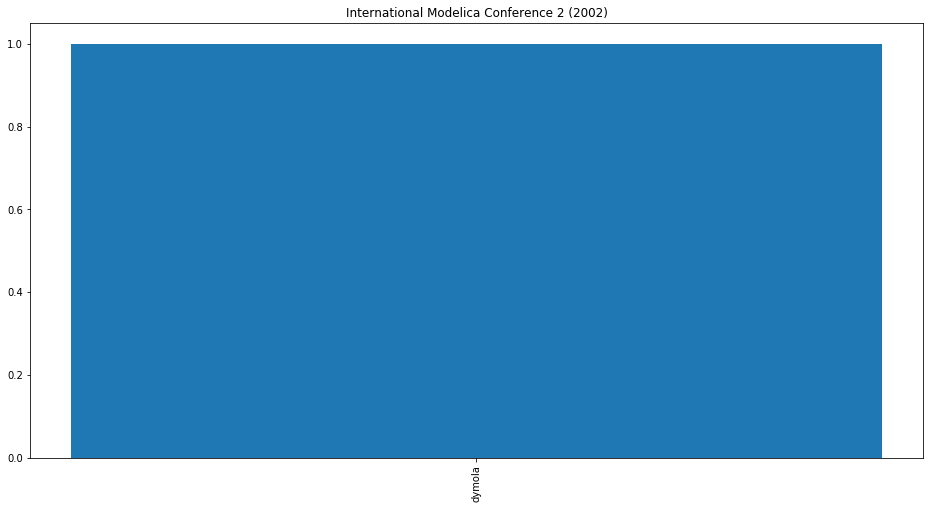

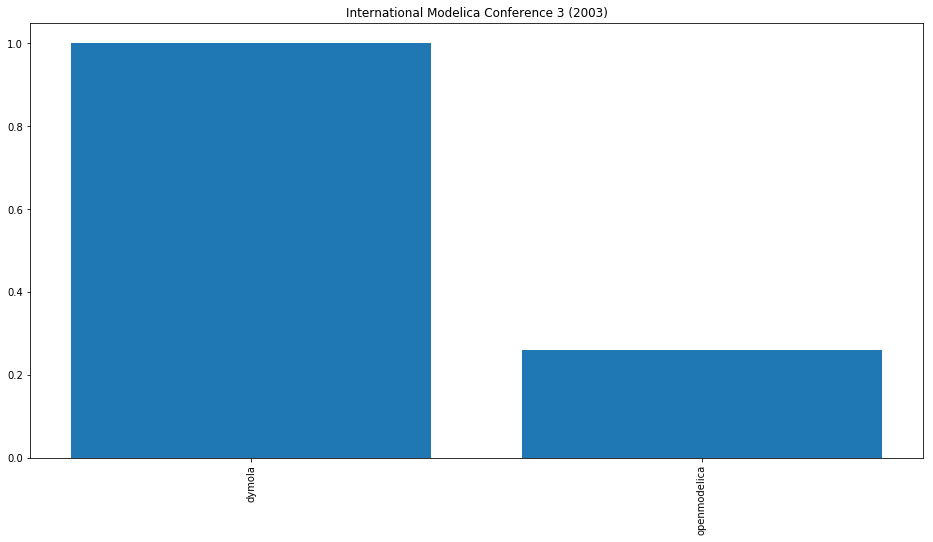

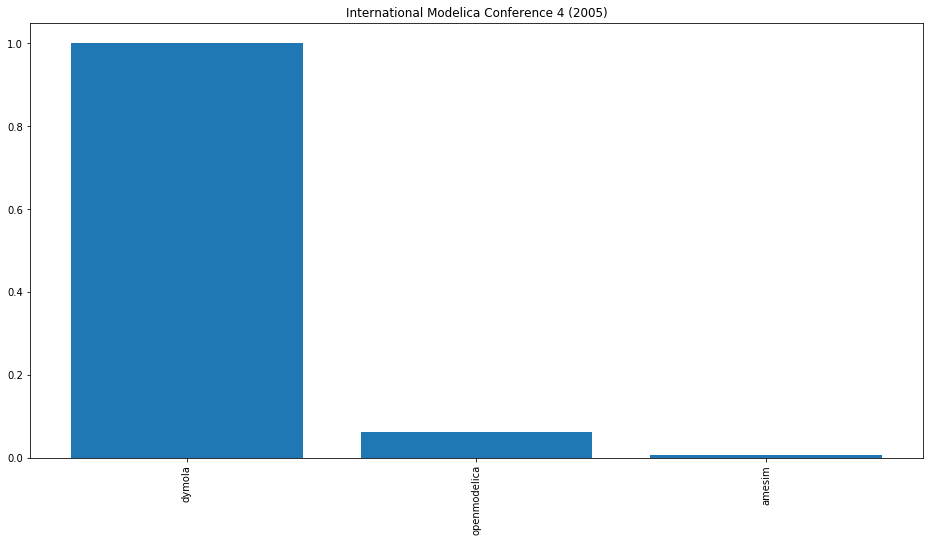

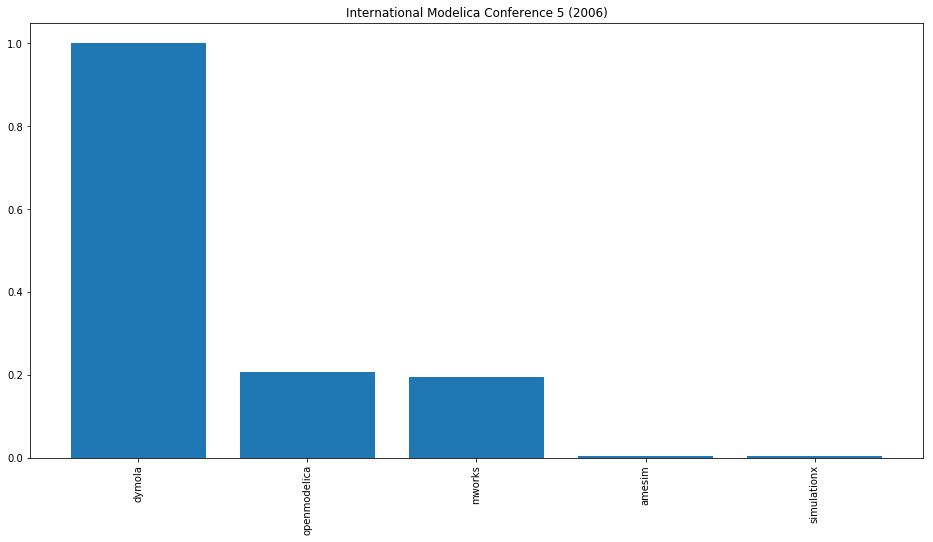

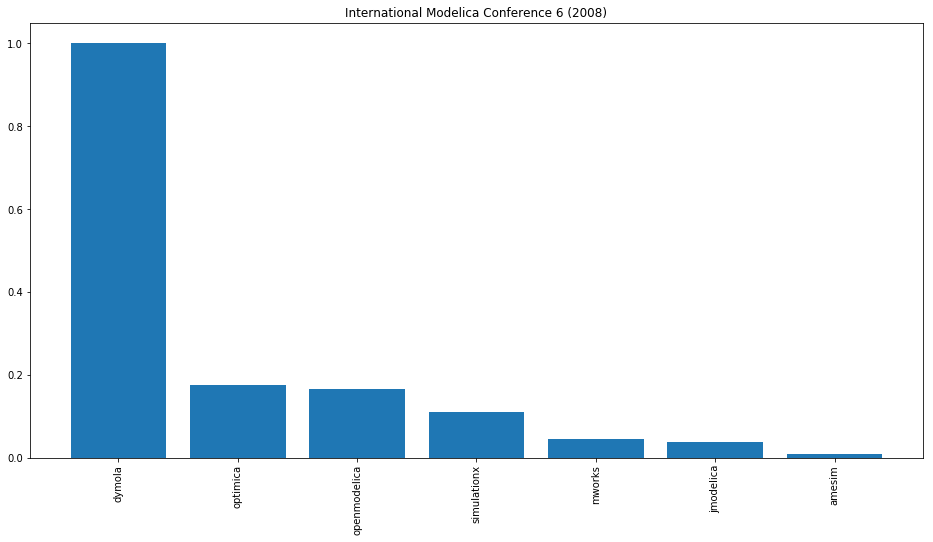

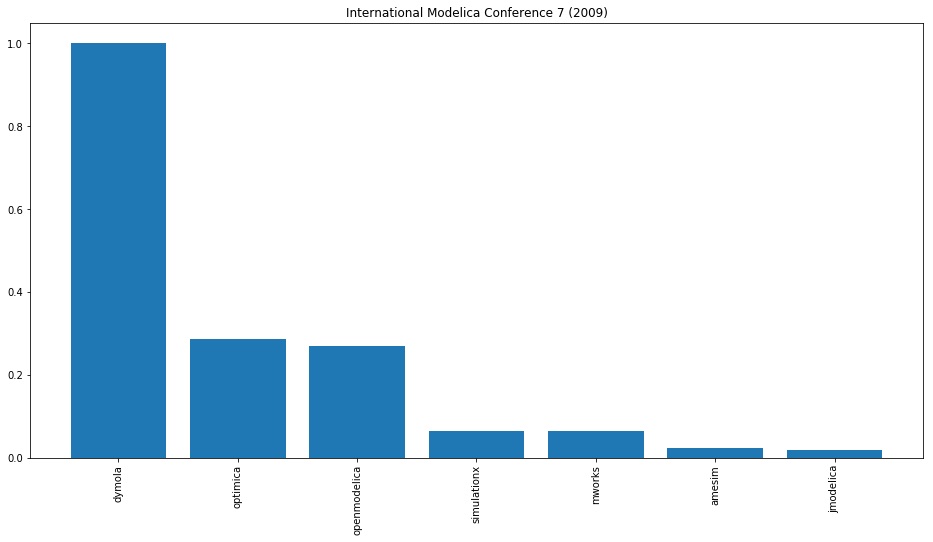

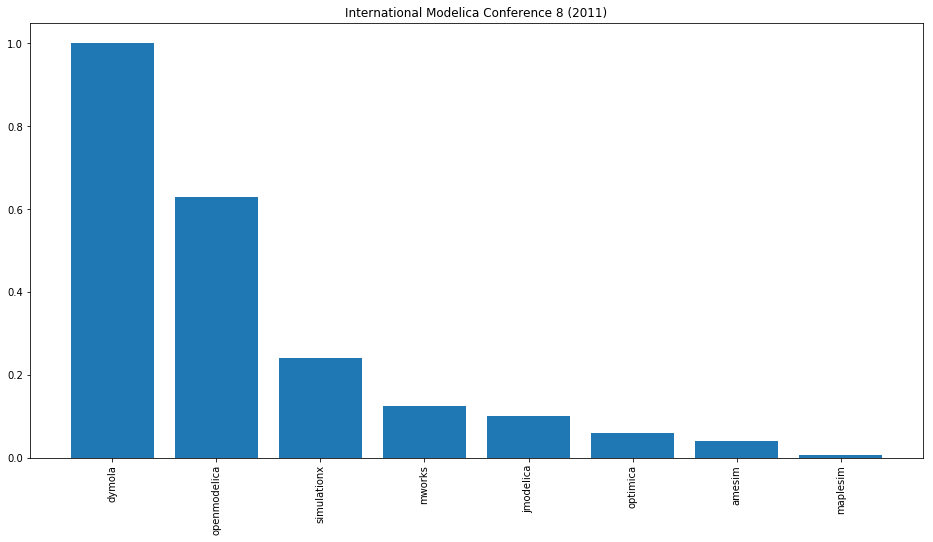

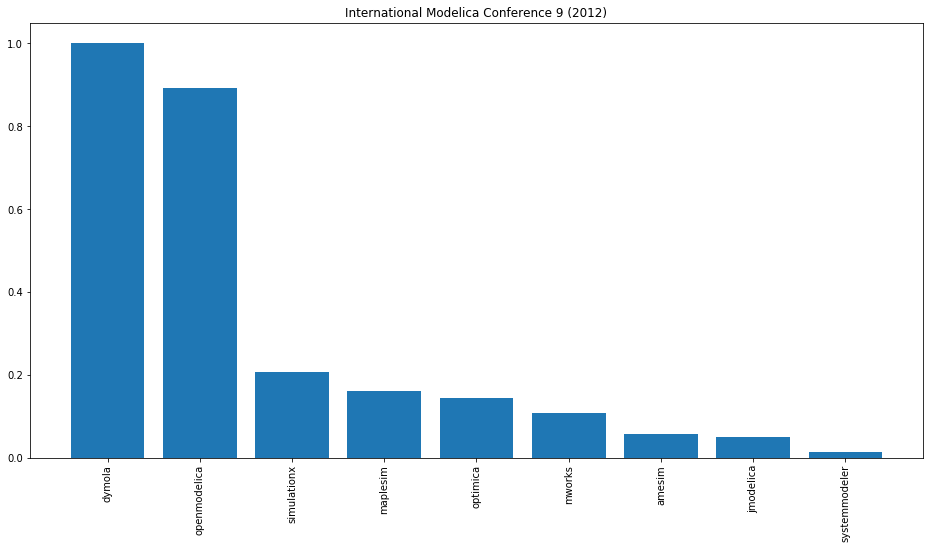

In [61]:
for key, val in text_full_list.items():
    
    val = ' '.join( [w for w in val.split() if len(w)>1] )
    
    includeWordsCount = dict.fromkeys(includeWords)
    for word in includeWords:
        includeWordsCount[word] = val.split().count(word)
        if includeWordsCount[word] == 0:
            del includeWordsCount[word]
        
    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white",width=800).generate_from_frequencies(includeWordsCount)
   
    s = os.path.split(DIR)[:-1]
    figName = os.path.join(*s,'plots','includeWords_bar_'+key)
    
    wordcloud.to_file('{}.png'.format(figName))
    
    fig = plt.figure(figsize=(16,8))
    plt.bar(wordcloud.words_.keys(),wordcloud.words_.values())
    plt.xticks(rotation='vertical');
    plt.title('International Modelica Conference {} ({})'.format(key,year[np.int(key)-1]))
    plt.savefig('{}.png'.format(figName))

** Create movie: from terminal **
```
    sudo apt install ffmpeg
    ffmpeg -framerate 1 -i includeWords_%1d.png output.mp4
    ```